In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=100

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score ,KFold

In [3]:

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv("imports-85.data",names=cols)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
numeric=['normalized-losses', 'wheel-base', 'length',
         'width', 'height', 'curb-weight', 'bore', 'stroke',
         'compression-rate',
         'horsepower', 'peak-rpm',
         'city-mpg', 'highway-mpg', 'price']
numeric_cars=cars[numeric]

In [6]:
target_col=cars["price"]

In [7]:
numeric_cars=numeric_cars.replace("?",np.nan)

In [8]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [10]:
numeric_cars=numeric_cars.astype('float')

In [11]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
numeric_cars.dropna(subset=["price"],inplace=True)

In [13]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [14]:
numeric_cars[numeric_cars.isnull().any(axis=1)]

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
14,NaN,103.5,189.0,66.9,55.7,3055.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0
43,NaN,94.3,170.7,61.8,53.5,2337.0,3.31,3.23,8.5,78.0,4800.0,24.0,29.0,6785.0


In [15]:
numeric_cars.dropna(thresh=2,inplace=True)

In [16]:
numeric_cars=numeric_cars.fillna(numeric_cars.mean())

In [17]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
lp=numeric_cars["price"]
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars["price"]=lp

In [19]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [20]:
def knn_train_test(train,target,df):
    knn=KNeighborsRegressor()
    np.random.seed(1)
    random=np.random.permutation(df.index)
    rand_df=df.reindex(random)
    
    last_train_row=int(len(rand_df)/2)
    
    train_df=rand_df[:last_train_row]
    test_df=rand_df[last_train_row:]
    
    knn.fit(train_df[[train]],train_df[target])
    predict=knn.predict(test_df[[train]])
    rmse=(mean_squared_error(test_df[target],predict))**0.5
    return rmse

In [21]:
train_cols=numeric_cars.columns.drop("price")
rmses={}
for i in train_cols:
    rmse=knn_train_test(i,"price",numeric_cars)
    rmses[i]=rmse
rmses=pd.Series(rmses)
rmses.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [22]:
def knn_train_test2(train,target,df,k):
    knn=KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    shuf_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuf_index)
    
    last_train_row=int(len(rand_df.index)/2)
    train_df=rand_df[:last_train_row]
    test_df=rand_df[last_train_row:]
    
    knn.fit(train_df[[train]],train_df[target])
    predict=knn.predict(test_df[[train]])
    rmse=mean_squared_error(test_df[target],predict)**0.5
    return rmse

In [23]:
ks=[1,3,5,7,9]
col_rmses_for_each_k={}
for i in train_cols:
    k_rmses={}
    for k in ks:
        k_rmse=knn_train_test2(i,"price",numeric_cars,k)
        k_rmses[k]=k_rmse
    col_rmses_for_each_k[i]=k_rmses
col_rmses_for_each_k

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

In [24]:
mean_col_rmses={}
for k,v in col_rmses_for_each_k.items():
    avg_rmses=np.mean(list(v.values()))
    mean_col_rmses[k]=avg_rmses
series_mean_col_rmses=pd.Series(mean_col_rmses)
series_mean_col_rmses.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [25]:
def knn_train_test3(train,target,df):
    np.random.seed(1)
    shuf_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuf_index)
    
    last_train_row=int(len(rand_df.index)/2)
    train_df=rand_df[:last_train_row]
    test_df=rand_df[last_train_row:]
    
    k_values=[5]
    k_rmses={}
    for i in k_values:
        knn=KNeighborsRegressor(n_neighbors=i)
        knn.fit(train_df[train],train_df[target])
        predicted=knn.predict(test_df[train])
        rmse=mean_squared_error(test_df[target],predicted)**0.5
        k_rmses[i]=rmse
    return k_rmses


In [26]:
diff_features_rmses={}
best_2=["horsepower","width"]
rmse=knn_train_test3(best_2,"price",numeric_cars)
diff_features_rmses["best_2"]=rmse

best_3=["horsepower","width","curb-weight"]
rmse=knn_train_test3(best_3,"price",numeric_cars)
diff_features_rmses["best_3"]=rmse

best_4=["horsepower","width","curb-weight","highway-mpg"]
rmse=knn_train_test3(best_4,"price",numeric_cars)
diff_features_rmses["best_4"]=rmse

best_5=["horsepower","width","curb-weight","highway-mpg","length"]
rmse=knn_train_test3(best_5,"price",numeric_cars)
diff_features_rmses["best_5"]=rmse


In [27]:
diff_features_rmses

{'best_2': {5: 3589.3132622073304},
 'best_3': {5: 3305.9401397969677},
 'best_4': {5: 3358.6915801682458},
 'best_5': {5: 3665.546673045813}}

In [28]:
def knn_train_test3(train,target,df):
    np.random.seed(1)
    shuf_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuf_index)
    
    last_train_row=int(len(rand_df.index)/2)
    train_df=rand_df[:last_train_row]
    test_df=rand_df[last_train_row:]
    
    k_values=[i for i in range(1,26)]
    k_rmses={}
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train],train_df[target])
        predicted=knn.predict(test_df[train])
        rmse=mean_squared_error(test_df[target],predicted)**0.5
        k_rmses[k]=rmse
    return k_rmses


In [29]:
diff_features_rmses={}
best_3=["horsepower","width","curb-weight"]
rmse=knn_train_test3(best_3,"price",numeric_cars)
diff_features_rmses["best_3"]=rmse

best_4=["horsepower","width","curb-weight","highway-mpg"]
rmse=knn_train_test3(best_4,"price",numeric_cars)
diff_features_rmses["best_4"]=rmse

best_2=["horsepower","width"]
rmse=knn_train_test3(best_2,"price",numeric_cars)
diff_features_rmses["best_2"]=rmse


In [30]:
diff_features_rmses

{'best_2': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 'best_3': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.77110

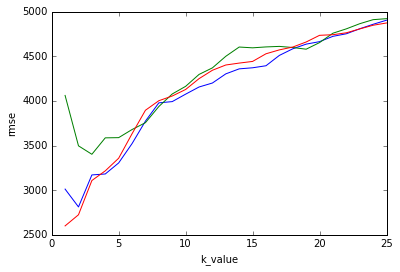

In [31]:
for k,v in diff_features_rmses.items():
    x=list(v.keys())
    y=list(v.values())
    
    plt.plot(x,y)
    plt.xlabel("k_value")
    plt.ylabel("rmse")